In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from models.ddpg import DDPG
from models.model import OUNoise
from env.TradeEnv import TradeEnv

/home/chenpeng/.conda/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = '../data/processed/'
df_macro = pd.read_csv(file_path + 'macro_data.csv')
df_stock = pd.read_csv(file_path + 'stock_data.csv')
df_factor = pd.read_csv(file_path + 'factor_data.csv')

env = TradeEnv(df_macro=df_macro, df_factor=df_factor, df_stock=df_stock)
agent = DDPG(env=env)
noise = OUNoise(action_dim=2)

Initialize trade environment...
Aligning df_macro, df_stock and df_factor...
df_macro shape:  (2674, 54)
df_stock shape:  (2674, 470)
df_factor shape:  (2674, 470)


In [3]:
batch_size = 128
rewards = []
avg_rewards = []

for episode in range(20):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    
    for i in range(1,5000):
        action = agent.get_action(state)
        action = noise.get_action(action, i)
        next_state, reward, terminated = env.step(action) 
        if not terminated:
            agent.memory.push(state, action, reward, next_state, terminated)
        
            state = next_state
            episode_reward += reward

        if len(agent.memory) > 1e3:
            agent.update(batch_size) 
            if i % 100 == 0:
                print('{}, {:>4d}: {:.7f}'.format(episode, i, episode_reward / i))

        if terminated:
            # sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

0, 1100: 0.0002674
0, 1200: 0.0006755
0, 1300: 0.0010500
0, 1400: 0.0007405
0, 1500: 0.0006053
0, 1600: 0.0006140
0, 1700: 0.0006080
0, 1800: 0.0005671
0, 1900: 0.0006616
0, 2000: 0.0006033
0, 2100: 0.0005105
0, 2200: 0.0004444
0, 2300: 0.0004957
0, 2400: 0.0004893
0, 2500: 0.0005403
0, 2600: 0.0006329
1,  100: -0.0000229
1,  200: 0.0014556
1,  300: 0.0008902
1,  400: 0.0003847
1,  500: -0.0000280
1,  600: 0.0002024
1,  700: 0.0000035
1,  800: 0.0002311
1,  900: 0.0005458
1, 1000: 0.0004634
1, 1100: 0.0004819
1, 1200: 0.0010029
1, 1300: 0.0013114
1, 1400: 0.0012118
1, 1500: 0.0010780
1, 1600: 0.0010710
1, 1700: 0.0010504
1, 1800: 0.0010006
1, 1900: 0.0010718
1, 2000: 0.0009794
1, 2100: 0.0008509
1, 2200: 0.0007892
1, 2300: 0.0009187
1, 2400: 0.0008783
1, 2500: 0.0009092
1, 2600: 0.0009621
2,  100: -0.0001738
2,  200: 0.0009606
2,  300: 0.0006968
2,  400: 0.0003004
2,  500: -0.0001852
2,  600: 0.0001154
2,  700: -0.0000420
2,  800: 0.0002951
2,  900: 0.0006207
2, 1000: 0.0006931
2, 1100

In [5]:
rewards

[1.780339636346642,
 2.6396141760248932,
 3.6947748843980164,
 3.620194817226792,
 4.441857223074835,
 4.71389155422871,
 4.989765783801922,
 5.412829529348664,
 5.289940390428559,
 5.773992247514404,
 6.54859765426835,
 6.3117115674710815,
 6.428014508145094,
 6.599472551321444,
 6.479949740565882,
 6.529610686035769,
 6.8344221709369934,
 7.131089589312679,
 7.2283870609160825,
 6.793114689976944]

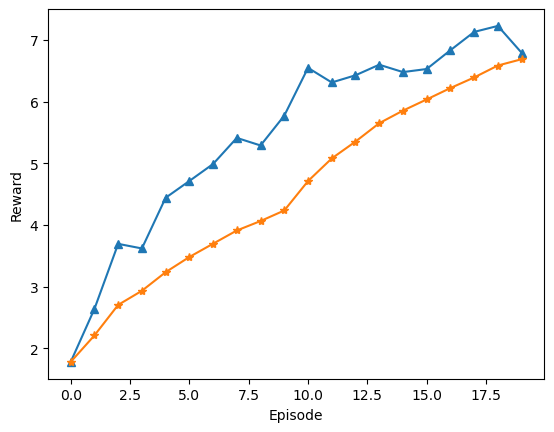

In [8]:
plt.plot(rewards, '-^')
plt.plot(avg_rewards, '-*')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()